# Assignment 3

## Instructions 
For full credit, earn 100 points. __Problem C__ is big, and worth 100 points on its own, with its own bonus questions. __Problem A__ and __Problem B__ are worth 35 and 25 respectively, so full credit requires significant progress on __Problem C__, but __Problem A__ and __Problem B__ are more closed-ended, i.e., likely can be finished more quickly. Please indicate clearly which components of the assignment are completed as you fill out your solution and turn it in.

## Problem A _(35 points)_
For this problem, you will be working with [flight data from the Bureau of Transporttaion Statistics](http://stat-computing.org/dataexpo/2009/the-data.html). For development, these data are a little largeish (~700Mb/7 million flights) for prototyping, so two truncated files are provided under `data/2007-10k.csv` and `data/2008-10k.csv`. __Important: it's strongly recommended to prototype and develop code using the truncated data.__

__Design note:__ The code you will develop as part of this problem's solution should be generalized so that it works when there are more than just two years' worth of data, i.e. when there are more files than just `2007.csv` and `2008.csv`.

__To work with the full dataset,__ go to the link and download the data files for 2007 and 2008.  Put these files in the `data/` directory and extract them. (The files can be extracted from the command line by navigating into `data/` and running `bunzip2 200{7..8}.csv.bz2`.

__A1.__ _(5 points)_ Write a function that takes a year as an input argument and loads the data for that year into a `pandas` dataframe, then drops the rows in the dataframe that have a null in any of these columns: "Year", "Month", "DayofMonth", "DepTime", "Origin", and "Dest", and then returns this dataframe. 

In [1]:
#Libraries in use:
import pandas as pd
import requests
import urllib
import csv
import bz2 
from bs4 import BeautifulSoup
from pprint import pprint
import re
import csv, json
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from functools import reduce

In [2]:
def dataframemaker(year):
    yearstring = str(year)
    csvfile = pd.read_csv("data/"+yearstring+".csv")
    csvselect = csvfile[["Year", "Month", "DayofMonth", "DepTime", "Origin", "Dest"]]
    df = csvselect.dropna(axis = "rows")
    return df

In [3]:
dataframemaker(2007)[:10]

,Year,Month,DayofMonth,DepTime,Origin,Dest
0,2007,1,1,1232.0,SMF,ONT
1,2007,1,1,1918.0,SMF,PDX
2,2007,1,1,2206.0,SMF,PDX
3,2007,1,1,1230.0,SMF,PDX
4,2007,1,1,831.0,SMF,PDX
5,2007,1,1,1430.0,SMF,PDX
6,2007,1,1,1936.0,SMF,PHX
7,2007,1,1,944.0,SMF,PHX
8,2007,1,1,1537.0,SMF,PHX
9,2007,1,1,1318.0,SMF,PHX


__A2.__ _(10 points)_ Update the function so that before returning the dataframe, it creates a new column in the dataframe that contains `datetime` objects holding the departure date of the flight.

In [4]:
def dataframemakeradddate(year):
    yearstring = str(year)
    csvfile = pd.read_csv("data/"+yearstring+".csv")
    csvselect = csvfile.loc[:,["Year", "Month", "DayofMonth", "DepTime", "Origin", "Dest"]]
    csvselect["DepDate"] = pd.to_datetime(dict(year=csvselect.Year, month=csvselect.Month, day=csvselect.DayofMonth))
    df = csvselect.dropna(axis = "rows")
    return df

In [5]:
dataframemakeradddate(2007)[:10]

,Year,Month,DayofMonth,DepTime,Origin,Dest,DepDate
0,2007,1,1,1232.0,SMF,ONT,2007-01-01
1,2007,1,1,1918.0,SMF,PDX,2007-01-01
2,2007,1,1,2206.0,SMF,PDX,2007-01-01
3,2007,1,1,1230.0,SMF,PDX,2007-01-01
4,2007,1,1,831.0,SMF,PDX,2007-01-01
5,2007,1,1,1430.0,SMF,PDX,2007-01-01
6,2007,1,1,1936.0,SMF,PHX,2007-01-01
7,2007,1,1,944.0,SMF,PHX,2007-01-01
8,2007,1,1,1537.0,SMF,PHX,2007-01-01
9,2007,1,1,1318.0,SMF,PHX,2007-01-01


__A3.__ _(5 points)_ Update the function so that it also takes an airport code as an input argument, and returns a dataframe of flights originating from that airport that occurred in the specified year. \[__Hint__: while prototyping, to test your code choose an `'Origin'` that's in the truncated file, like  Philly's airport!\]

In [6]:
def dfmakeryearANDcode(year, airportcode):
    yearstring = str(year)
    csvfile = pd.read_csv("data/"+yearstring+".csv")
    csvselect = csvfile.loc[:,["Year", "Month", "DayofMonth", "DepTime", "Origin", "Dest"]]
    csvselect["DepDate"] = pd.to_datetime(
        dict(year=csvselect.Year, month=csvselect.Month, day=csvselect.DayofMonth))
    df1 = csvselect.dropna(axis = "rows")
    df = df1[df1["Origin"] == airportcode]
    return df

In [7]:
dfmakeryearANDcode(2007, "PHL")[:10]

,Year,Month,DayofMonth,DepTime,Origin,Dest,DepDate
2453,2007,1,2,1104.0,PHL,BDL,2007-01-02
2454,2007,1,2,1616.0,PHL,BDL,2007-01-02
2455,2007,1,2,829.0,PHL,BDL,2007-01-02
2456,2007,1,2,1834.0,PHL,BNA,2007-01-02
2457,2007,1,2,700.0,PHL,BNA,2007-01-02
2458,2007,1,2,900.0,PHL,CMH,2007-01-02
2459,2007,1,2,1637.0,PHL,CMH,2007-01-02
2460,2007,1,2,2031.0,PHL,CMH,2007-01-02
2461,2007,1,2,1351.0,PHL,FLL,2007-01-02
2462,2007,1,2,1719.0,PHL,FLL,2007-01-02


__A4.__ _(5 points)_ Using this function, create dataframes holding the flight data for Philadelphia International Airport (PHL) for 2007 and 2008. Then use the `.groupby()` method to obtain the busiest month of the year for both years. Did this change from 2007 to 2008? 

In [8]:
dfPHL2007 = dfmakeryearANDcode(2007, "PHL").groupby(['Month'])
dfPHL2008 = dfmakeryearANDcode(2008, "PHL").groupby(['Month'])

In [9]:
dfPHL2007monthly = dfPHL2007.size().reset_index(name='counts')
dfPHL2008monthly = dfPHL2008.size().reset_index(name='counts')

In [10]:
dfPHL2007monthly.head(12)

,Month,counts
0,1,8672
1,2,7528
2,3,8674
3,4,8713
4,5,8928
5,6,8465
6,7,8856
7,8,8875
8,9,8196
9,10,8487


In [11]:
dfPHL2008monthly.head(12)

,Month,counts
0,1,8047
1,2,7477
2,3,8485
3,4,8250
4,5,8399
5,6,8481
6,7,8698
7,8,8573
8,9,8071
9,10,8504


In [12]:
print("Busiest month in the year 2007 is: "+str(dfPHL2007monthly.loc[dfPHL2007monthly['counts'].idxmax()]))
print("Busiest month in the year 2008 is: "+str(dfPHL2008monthly.loc[dfPHL2008monthly['counts'].idxmax()]))

Busiest month in the year 2007 is: Month        5
counts    8928
Name: 4, dtype: int64
Busiest month in the year 2008 is: Month        7
counts    8698
Name: 6, dtype: int64


##### <font color=blue> Yes, the busiest month changed from 2007 to 2008. In 2007, he busiest month was May but in 2008, it was July.</font>

__A5.__ _(10 points)_ Update the function so that instead of a year value, it now takes two dates as input, denoting a range. The function must now return all flights originating from the specified airport within this range of time. If the range spans multiple years, the function should load data from all necessary files and return a single dataframe containing all the data within the specified range of time.

Using this function, get all the flight data for flights from PHL for all of 2007 and 2008. Then, create a daily count of flights over all of the days in the two years.

In [13]:
def dfmakertimerange(start, stop, airportcode):
    startdate = datetime.strptime(start, '%Y-%m-%d')
    stopdate = datetime.strptime(stop, '%Y-%m-%d')
    if startdate.year-stopdate.year:
        df_start = dataframemakeradddate(startdate.year)
        df_stop = dataframemakeradddate(stopdate.year)
        dfstart = df_start[(df_start["Origin"] == airportcode) 
                 & (df_start["DepDate"] >= startdate)]
        dfstop = df_stop[(df_stop["Origin"] == airportcode) 
                 & (df_stop["DepDate"] <= stopdate)]
        df = pd.concat([dfstart,dfstop])
    else:
        df1 = dataframemakeradddate(startdate.year)
        df = df1[(df1["Origin"] == airportcode) 
                 & (df1["DepDate"] >= startdate) 
                 & (df1["DepDate"] <= stopdate)]
    return df

In [14]:
PHLJan2007toDec2008 = dfmakertimerange("2007-1-1", "2008-12-31", "PHL")

In [15]:
PHLJan2007toDec2008.head()

,Year,Month,DayofMonth,DepTime,Origin,Dest,DepDate
2453,2007,1,2,1104.0,PHL,BDL,2007-01-02
2454,2007,1,2,1616.0,PHL,BDL,2007-01-02
2455,2007,1,2,829.0,PHL,BDL,2007-01-02
2456,2007,1,2,1834.0,PHL,BNA,2007-01-02
2457,2007,1,2,700.0,PHL,BNA,2007-01-02


In [16]:
PHLJan2007toDec2008.tail()

,Year,Month,DayofMonth,DepTime,Origin,Dest,DepDate
7009303,2008,12,13,1131.0,PHL,ATL,2008-12-13
7009304,2008,12,13,1233.0,PHL,ATL,2008-12-13
7009306,2008,12,13,1354.0,PHL,ATL,2008-12-13
7009308,2008,12,13,1659.0,PHL,ATL,2008-12-13
7009435,2008,12,13,657.0,PHL,SLC,2008-12-13


In [17]:
DailyCount = PHLJan2007toDec2008.groupby(['DepDate']).size().reset_index(name='DailyCounts')
DailyCount.head()

,DepDate,DailyCounts
0,2007-01-01,267
1,2007-01-02,300
2,2007-01-03,298
3,2007-01-04,297
4,2007-01-05,282


__BONUS.__ _(5 points)_ Display the daily counts in a plot. 

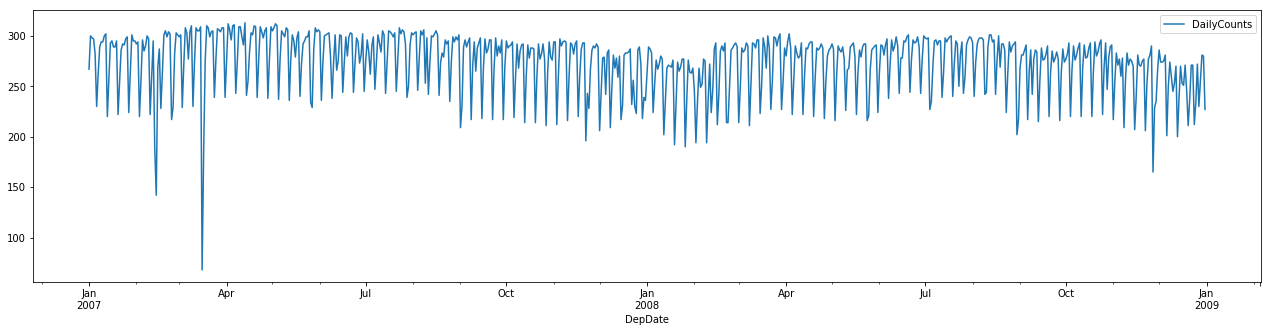

In [18]:
plt.rcParams['figure.figsize'] = [22, 5]
DailyCount.plot(x='DepDate', y='DailyCounts')

## Problem B _(25 points)_

In this problem, you will be using the [Baseball Databank provided by Sean Lahman](http://seanlahman.com/baseball-archive/statistics/). This data is already in the `data/baseballdatabank2017.1/core/` directory. It contains a collection of tables. The immediate goal will be to create a dataframe that has the following information for each baseball player:

- Batting statistics (to be described)
- Fielding statistics (to be described)
- Pitching statistics (to be described)
- Their salaries
- The teams they played for
- Their full names: First Middle Last
- Their heights and weights

The dataset has a data dictionary available at:

- `../data/baseballdatabank-2017.1/core/readme2014.txt`

The data and tables you will need are:

- `Batting.csv`
    - The number of games played and at bats
    - The number of runs, hits, doubles, triples, homeruns, RBIs, strikeouts, and times hit by
- `Fielding.csv`
    - The number of games played
    - The number of opponents put out, assisted outs, and fielding errors
- `Master.csv`
    - Their full names
    - Their heights and weights
- `Pitching.csv`
    - The number of games played, won, lost
    - The number of strikeouts, hits, earned runs, homeruns, and batters hit by pitches   
- `Salaries.csv`
    - The players salary
- `Teams.csv`
    - The name of the player's team
    - The year the team was named its name
    
__B1.__ _(5 points)_ Load the data and keep only the columns of interest. 

In [2]:
Battingcsv = pd.read_csv("./data/baseballdatabank-2017.1/core/Batting.csv")
Battingcsvselect = Battingcsv[[
    "playerID", "yearID", "teamID", "G", "AB", "R", "H", "2B", "3B", "HR", "RBI", "SO", "HBP"]]
Battingcsvselect.head(2)

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,SO,HBP
0,abercda01,1871,TRO,1,4,0,0,0,0,0,0.0,0.0,NaN
1,addybo01,1871,RC1,25,118,30,32,6,0,0,13.0,0.0,NaN


In [3]:
Fieldingcsv = pd.read_csv("data/baseballdatabank-2017.1/core/Fielding.csv")
Fieldingcsvselect = Fieldingcsv[["playerID", "yearID", "teamID", "G", "PO", "A", "E"]]
Fieldingcsvselect.head(2)

,playerID,yearID,teamID,G,PO,A,E
0,abercda01,1871,TRO,1,1,3.0,2.0
1,addybo01,1871,RC1,22,67,72.0,42.0


In [4]:
Mastercsv = pd.read_csv("data/baseballdatabank-2017.1/core/Master.csv")
Mastercsvselect = Mastercsv[["playerID", "nameFirst", "nameGiven", "nameLast", "height", "weight"]]
Mastercsvselect.head(2)

,playerID,nameFirst,nameGiven,nameLast,height,weight
0,aardsda01,David,David Allan,Aardsma,75.0,215.0
1,aaronha01,Hank,Henry Louis,Aaron,72.0,180.0


In [5]:
Pitchingcsv = pd.read_csv("data/baseballdatabank-2017.1/core/Pitching.csv")
Pitchingcsvselect = Pitchingcsv[["playerID", "yearID", "teamID", "G", "W", "L", "SO", "H", "ER", "HR", "HBP"]]
Pitchingcsvselect.head(2)

,playerID,yearID,teamID,G,W,L,SO,H,ER,HR,HBP
0,bechtge01,1871,PH1,3,1,2,1,43,23,0,NaN
1,brainas01,1871,WS3,30,12,15,13,361,132,4,NaN


In [6]:
Salariescsv = pd.read_csv("data/baseballdatabank-2017.1/core/Salaries.csv")
Salariescsvselect = Salariescsv[["playerID", "yearID", "teamID", "salary"]]
Salariescsvselect.head(2)

,playerID,yearID,teamID,salary
0,barkele01,1985,ATL,870000
1,bedrost01,1985,ATL,550000


In [7]:
Teamscsv = pd.read_csv("data/baseballdatabank-2017.1/core/Teams.csv")
Teamscsvselect = Teamscsv[["teamID", "yearID", "name"]]
Teamscsvselect.head(2)

,teamID,yearID,name
0,BS1,1871,Boston Red Stockings
1,CH1,1871,Chicago White Stockings


__B2.__ _(5 points)_ Create a function that takes a year as input and outputs subsets of each of the tables with data from only that year.

In [8]:
def baseballyearfilter(year):
    dfBatting = Battingcsvselect[Battingcsvselect["yearID"] == year]
    dfFielding = Fieldingcsvselect[Fieldingcsvselect["yearID"] == year]
    dfPitching = Pitchingcsvselect[Pitchingcsvselect["yearID"] == year]
    dfSalaries = Salariescsvselect[Salariescsvselect["yearID"] == year]
    dfTeams = Teamscsvselect[Teamscsvselect["yearID"] == year]
    return[dfBatting, dfFielding, dfPitching, dfSalaries, dfTeams]

In [9]:
baseballyearfilter(2000)[0].head(2)

,playerID,yearID,teamID,G,AB,R,H,2B,3B,HR,RBI,SO,HBP
79250,abbotje01,2000,CHA,80,215,31,59,15,1,3,29.0,38.0,2.0
79251,abbotku01,2000,NYN,79,157,22,34,7,1,6,12.0,51.0,1.0


In [10]:
baseballyearfilter(2000)[4].head(2)

,teamID,yearID,name
2325,ANA,2000,Anaheim Angels
2326,ARI,2000,Arizona Diamondbacks


__B3.__ _(10 points)_ Write a new function that will again take a year as input, then use the previous filtering function to get separate tables, and finally merge these tables using the appropriate joins. Determine which columns have the same names but different values, then determine a useful naming scheme of suffixes that indicates the table the column was originally drawn from. Use this scheme in combination with the `suffixes` argument of the `merge()` function to avoid column name conflicts. Also remove duplicate columns from the merged table.

In [20]:
def suffix_fixer(inputdf, suffix):
    colswithsuffix = inputdf.columns[~inputdf.columns.isin(['playerID', 'teamID', 'yearID'])]
    outputdf = inputdf.rename(columns = dict(zip(
        colswithsuffix, colswithsuffix + "_" + suffix)), inplace=False)
    return outputdf

In [38]:
def yearlybaseballinfo(year): 
    yearfilterlist = baseballyearfilter(year)
    
    fixedBatting = suffix_fixer(yearfilterlist[0], "Batting")
    fixedFielding = suffix_fixer(yearfilterlist[1], "Fielding")
    fixedPithing = suffix_fixer(yearfilterlist[2], "Pitching")
    fixedSalaries = yearfilterlist[3]
    df1 = reduce(lambda left,right: pd.merge(
        left,right,on=['playerID', 'teamID', 'yearID']), 
                 [fixedBatting, fixedFielding, fixedPithing, fixedSalaries])
    df2 = pd.merge(
        df1, yearfilterlist[4],  how='outer', left_on=['teamID', 'yearID'], right_on = ['teamID', 'yearID'])
    dffinal = pd.merge(
        df2, Mastercsvselect,  how='outer', left_on='playerID', right_on = 'playerID')

    return dffinal

In [39]:
dfBaseballInfo  = yearlybaseballinfo(2000)
dfBaseballInfo.head()

,playerID,yearID,teamID,G_Batting,AB_Batting,R_Batting,H_Batting,2B_Batting,3B_Batting,HR_Batting,...,ER_Pitching,HR_Pitching,HBP_Pitching,salary,name,nameFirst,nameGiven,nameLast,height,weight
0,abbotpa01,2000.0,SEA,35.0,5.0,1.0,2.0,1.0,0.0,0.0,...,84.0,23.0,5.0,285000.0,Seattle Mariners,Paul,Paul David,Abbott,75.0,185.0
1,garcifr02,2000.0,SEA,21.0,3.0,0.0,2.0,0.0,0.0,0.0,...,54.0,16.0,2.0,325000.0,Seattle Mariners,Freddy,Freddy Antonio,Garcia,76.0,250.0
2,halamjo01,2000.0,SEA,30.0,2.0,0.0,1.0,0.0,0.0,0.0,...,94.0,19.0,2.0,290000.0,Seattle Mariners,John,John Thadeuz,Halama,77.0,215.0
3,mabryjo01,2000.0,SEA,48.0,103.0,18.0,25.0,5.0,0.0,1.0,...,2.0,0.0,0.0,1850000.0,Seattle Mariners,John,John Steven,Mabry,76.0,195.0
4,mabryjo01,2000.0,SEA,48.0,103.0,18.0,25.0,5.0,0.0,1.0,...,2.0,0.0,0.0,1850000.0,Seattle Mariners,John,John Steven,Mabry,76.0,195.0


In [40]:
dfBaseballInfo.isnull().any()

playerID        False
yearID           True
teamID           True
G_Batting        True
AB_Batting       True
R_Batting        True
H_Batting        True
2B_Batting       True
3B_Batting       True
HR_Batting       True
RBI_Batting      True
SO_Batting       True
HBP_Batting      True
G_Fielding       True
PO_Fielding      True
A_Fielding       True
E_Fielding       True
G_Pitching       True
W_Pitching       True
L_Pitching       True
SO_Pitching      True
H_Pitching       True
ER_Pitching      True
HR_Pitching      True
HBP_Pitching     True
salary           True
name             True
nameFirst        True
nameGiven        True
nameLast        False
height           True
weight           True
dtype: bool

__B4.__ _(5 points)_ There will be nulls in the data. Determine how to deal with the NAs and apply this strategy. 

<font color=blue>Due to joining the dataframes with outer join command, if the data is not present in the first dataframe but present in the second, the data value would be NA in the column from the first dataframe. It means that if the player is only a pitcher there would be not be necessary any value for batting for example. Therefore, for these values we can substitute zero for the NA values. For the missing values in height, weight, and salary we can put the average value. for the rest of the missing values, we can either drop them or fill them with a feasible value.</font>

In [56]:
dfBaseballInfo['height'].fillna((dfBaseballInfo['height'].mean()), inplace=True)
dfBaseballInfo['weight'].fillna((dfBaseballInfo['weight'].mean()), inplace=True)
dfBaseballInfo['salary'].fillna((dfBaseballInfo['salary'].mean()), inplace=True)
fillwithzerocols = ['G_Batting', 'AB_Batting', "R_Batting", "H_Batting", "2B_Batting", "3B_Batting", 
 "HR_Batting", "RBI_Batting", "SO_Batting", "HBP_Batting", "G_Fielding", "PO_Fielding", 
 "A_Fielding", "E_Fielding", "G_Pitching", "W_Pitching", "L_Pitching", "SO_Pitching", 
 "H_Pitching", "ER_Pitching", "HR_Pitching", "HBP_Pitching"]
dfBaseballInfo.update(dfBaseballInfo[fillwithzerocols].fillna(0))
dfBaseballInfo['teamID'].fillna("NoTeam", inplace=True)
dfBaseballInfo.dropna(axis = "rows", inplace=True)

In [57]:
dfBaseballInfo.isnull().any()

playerID        False
yearID          False
teamID          False
G_Batting       False
AB_Batting      False
R_Batting       False
H_Batting       False
2B_Batting      False
3B_Batting      False
HR_Batting      False
RBI_Batting     False
SO_Batting      False
HBP_Batting     False
G_Fielding      False
PO_Fielding     False
A_Fielding      False
E_Fielding      False
G_Pitching      False
W_Pitching      False
L_Pitching      False
SO_Pitching     False
H_Pitching      False
ER_Pitching     False
HR_Pitching     False
HBP_Pitching    False
salary          False
name            False
nameFirst       False
nameGiven       False
nameLast        False
height          False
weight          False
dtype: bool

## Problem C _(100 points)_

In this exercise we'll build and expand a cheese and wine pairings database with the high-level goal of linking wine varieties and recipe ingredients.

A Google search on food and wine pairings turned up a literature Ph.D. candidate's blog post:
+ http://sedimentality.com/drinking-wine/list-of-wine-and-food-pairings/

This post is interesting, because instead of pairing dishes with wine vintages or brands, it pairs ingredients with wine varieties, tagging ingredients by several categories. Thus, we could pull the data from this website to join wine varieties from a large wine reviews database to ingredients in a large recipes database. Your goal in this section of the assignment is to collect the ingredient-variety-category data.

__C1.__ _(5/5 pts)_ Why are we allowed to scrape this data out of the website?

Explain what information is posted (or not posted) on this domain, allowing us to definitely move forward with this exercise. Use the markdown cell below.

<font color=blue>The blog itself does not specify any terms of service for scrapers or any guidelines for using the data but Wordpress allows us to use a single copy for personal use from any of their websites.</font>

__C2.__ _(5/10 pts)_ Download the blog post using the `requests` module and store the html response.

In [58]:
WineURL = "http://sedimentality.com/drinking-wine/list-of-wine-and-food-pairings/"
html_textWine = requests.get(WineURL)
soupWine = BeautifulSoup(html_textWine.text, 'html.parser')

__C3.__ _(5/15 pts)_ Navigate to the same URL in your web browser, and identify where the target data are by inspecting the html (with your eyes) and matching up tags with the target content.

In the markdown cell below, describe the tags that you will need to extract the data from. Provide as much information as is necessary on the nesting of the document so as to be able to describe the location of the target data for parsing.

<font color=blue>The required information is the name of the wine, the types of cheese that goes with wine and other ingredients. The name of the wine is in the tag "h2", the other information is under p tags and categorized by cheese/nuts, meat/poultry, etc. There is also a brief description of the wine itself that we can use in our analysis. </font>

__C4.__ _(10/25 pts)_ Parse the html text with BeautifulSoup in preparation for scraping. Then, print out the target data. \[__Hint__: use `BeautifulSoup`'s `.find_all(tag_list)` method to iterate through the tags identified in __C3__. From there, check to see if a tag has the data of interest by using the `.find(tag)` method. \]

In [59]:
div_tag_for_wines = soupWine.find_all('div')
WineBlock = div_tag_for_wines[16]

__C5.__ _(5/30 pts)_ Interpret the output from the previous part to make a plan for how to split the target data up with regular expressions to create a structured data object. Describe any structure that you'll use in the markdown cell, below.

<font color=blue>I have extracted the names of the wines in alist and a list of all the food pairings. All the element types are strings. I am going to use regular expresions to extract the required info from these strings and then put them in a meaningful structure such as adictionary.</font>

<font color=blue>I will be making a list of dictionaries that has all the info such as the name of the wine and the food pairing in each category. I have splitted the string that contains the food pairing using the ":" sign and extracted the food as the values of the dictionary using regular expresions.</font>

__C6.__ _(5/35 pts)_ Create an associative array (dictionary) data structure that can hold the ingredients in their categories, by wine variety. Use a default dictionary with its default value as a dictionary.

In [60]:
Wine_ptags = WineBlock.find_all('p')
LinesOfWinePairings = []
for each_ptag in Wine_ptags:
    if each_ptag.find('strong'):
        LinesOfWinePairings.append(each_ptag.text)

In [61]:
WineNamessoup = WineBlock.find_all('h2')
WineNames = []
for wine in WineNamessoup:
     WineNames.append(wine.text)

__C7.__ _(10/45 pts)_ Complete the web-scraping script's loop in __C4__ and store the extracted data in the data structure you initialized in __C6__. Print the stored data to confirm your output. Note you'll need to use the regular expresions module to complete this section.

In [62]:
WineDicts = []
numwine = [1, 2, 3, 4, 5, 6, 7]
for n in numwine:
    WineInfo = {}
    WineInfo["Name"] = [name for name in WineNames][n-1]
    WineInfo["CheeseAndNuts"] = LinesOfWinePairings[7*(n-1)].split(":")[1]
    WineInfo["MeatAndPoultry"] = LinesOfWinePairings[7*(n-1)+1].split(":")[1]
    WineInfo["Seafood"] = LinesOfWinePairings[7*(n-1)+2].split(":")[1]
    WineInfo["FruitsAndVeggie"] = LinesOfWinePairings[7*(n-1)+3].split(":")[1]
    WineInfo["HerbsAndSpices"] = LinesOfWinePairings[7*(n-1)+4].split(":")[1]
    WineInfo["Sauces"] = LinesOfWinePairings[7*(n-1)+5].split(":")[1]
    WineInfo["Desserts"] = LinesOfWinePairings[7*(n-1)+6].split(":")[1]
    WineDicts.append(WineInfo)
pprint(WineDicts)

[{'CheeseAndNuts': ' feta, goat cheese, pine nuts',
  'Desserts': ' sorbet, key lime pie, meringue, mango',
  'FruitsAndVeggie': ' citrus, green apple, asparagus',
  'HerbsAndSpices': ' chives, tarragon, cilantro',
  'MeatAndPoultry': ' chicken, turkey, pork',
  'Name': 'Sauvignon Blanc',
  'Sauces': ' citrus and light cream sauces',
  'Seafood': ' fatty white fish, oysters, scallops, lobster, shrimp, sushi'},
 {'CheeseAndNuts': '\xa0mild, semi-soft cheeses with unoaked Chardonnay; '
                   'asiago, havarti, Stilton or other blue-veined cheeses with '
                   'oaky Chardonnay; almonds and nearly any toasted nut',
  'Desserts': ' banana bread, vanilla pudding',
  'FruitsAndVeggie': ' potato, apple, squash, mango',
  'HerbsAndSpices': ' tarragon, sesame, basil',
  'MeatAndPoultry': ' veal, chicken, pork',
  'Name': 'Chardonnay',
  'Sauces': ' cream sauces, pesto',
  'Seafood': ' halibut, shrimp, crab, lobster'},
 {'CheeseAndNuts': ' Havarti, gouda, candied walnuts 

__C8.__ _(5/50 pts)_ Write your data out to a json file. Name this file: `./data/wine_ingredient-pairings.json`.

Note: since `defaultdicts` are not json serialiable (you can't make a file out of them), you will have to coerce (type cast) your final data to a standard Python dictionary to finish the job.

In [76]:
json.dump(WineDicts, open("./data/wine_ingredient-pairings.json", "w"))

__C9.__ _(5/55 pts)_ What limitations did you observe in this data, and in your extraction of this data?

Were there any issues either with this data's content, volume, its veracity or accuracy? Were you able to get all of the data present? Did you wind up getting some data that you didn't want or need, or maybe not in the right form? Take a look at the wine and categories keys—are they consistent? Be as specific as possible!

<font color=blue>The main obstacle for etxtraction of data was the way the HTML code was arranged. The whole wine information paired with all the proper food was located in a div tag which was the 16th element of the extracted div-tag list. Then by studying the p tags, we mistakenly extracted some information that was not needed such as the introduction to wine and food pairing which was before the main part. Also, the names of the wines were in a h2 tag with bold letters which we extracted seperately and added to the main dictionary.</font>
<br/><br/>
<font color=blue>The extracted content is pretty small in volume, and in the dictionary that we have biult at the end the accuracy is fairly well. content consists of the name of the wines and a list of food pairings with different categories. We need to seperate each food in each category to turn the data into a more understandable shape.</font>

__BONUS__ _(5 pts)_ Supposing we were going to rebuild the scraped wine-food pairings data as a gold standard through a survey. Are there any changes to allowable food types or to the manner in which the data are organized that might be beneficial to the wine recommendation task?

<font color=blue>We could seperate the types of each category, such as different types of cheese or types of nuts seperatly. We could make types of fruits in the fruits category. For example, we can categorize the fruits by Tropical, Dried fruits of types of Berries. We can add another factor such as the taste of the wine itself, such as dry or fruity!</font>

__C10.__ _(5/60 pts)_ Download and familiarize yourself with the cuisine prediction dataset: https://www.kaggle.com/kaggle/recipe-ingredients-dataset (it's only necessary to download the `train.json` file and work with that).
We're going to enrich our current data by adding results from this dataset.

In [77]:
recipes = json.load(open("./data/train.json", "r"))

In [78]:
pprint(recipes[0:2])
print(len(recipes))
#it is a list of dictionaries with cuisines names, ids and ingredients

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']}]
39774


In [79]:
dfrecipes = pd.DataFrame(recipes)
dfrecipes.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


__C11.__ _(15/75 pts)_ Expand each wine variety's list of foods to include any co-appearing in the recipes found in the above Kaggle dataset. Make sure to record how often ingredients in the Kaggle recipes occured alongside foods in the wine variety list. Store this information in another nested `defaultdict`, with the following structure:

```
wines = {
    wine: {
        food_category: {
            pairing: Counter(),
            ...
        },
        ...
    },
    ...
}
```

In [124]:
#WineDicts is a list of dictionaries with wine info that we made in the previous part
Wines = {}
for eachwinecat in WineDicts:
    for i in range(len(WineDicts)):
        Food = {}
        for eachkey in WineDicts[i].keys():
            foodlist = eachwinecat[eachkey].strip().split(", ")
            foodcounter = []
            for individualfood in foodlist:
                n = []
                for reci in recipes:
                    if individualfood in reci['ingredients']:
                        n.append(True)
                    else:
                        n.append(False)
                foodcounter.append((individualfood, sum(n)))
            Food[eachkey] = foodcounter
            Food.pop("Name", None)
            Wines[eachwinecat['Name']] = Food
pprint(Wines['Cabernet Sauvignon '])

{'CheeseAndNuts': [('cheddar', 0), ('gorgonzola', 31), ('walnuts', 114)],
 'Desserts': [('bittersweet chocolate', 140)],
 'FruitsAndVeggie': [('black cherries', 1),
                     ('tomatoes', 3058),
                     ('broccoli', 220)],
 'HerbsAndSpices': [('rosemary', 107), ('juniper', 0), ('lavender', 4)],
 'MeatAndPoultry': [('venison', 6), ('rib eye', 0), ('beef stew', 1)],
 'Sauces': [('brown sauce', 1), ('tomato sauce', 865)],
 'Seafood': [('grilled ahi tuna', 0)]}


__BONUS.__ _(5 pts)_ How would you create the above structure for `wines` using nested a nested `defaultdict`?

<font color=blue>We can add another for loop to go over each ingredient list in the Kaggle dictionary instead of searching in the columns of the dataframe. The latter would be faster.</font>

__C12.__ _(10/90 pts)_ We'd also like to incorporate a wine review dataset. Download and familiarize yourself with the dataset, found at: https://www.kaggle.com/zynicide/wine-reviews. Specifically, utilize the file: `winemag-data-130k-v2.csv` to link each of the scraped wines found in `wines` to the specific names of the wines which are of that variety (i.e., for the Sauvignon wine, create a list of all the wines with `variety` column that say Sauvignon, and attach them to the `wines` object from before).

In [137]:
csvwinemag = pd.read_csv("./data/winemag-data-130k-v2.csv")
WineMag = csvwinemag[["country", "description", "designation", "points", "price", 
                      "province", "region_1", "region_2", "variety", "winery"]]

In [138]:
WineMag.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [139]:
WineDataFrame = pd.DataFrame(WineDicts)

In [140]:
WineDataFrame.head()

,CheeseAndNuts,Desserts,FruitsAndVeggie,HerbsAndSpices,MeatAndPoultry,Name,Sauces,Seafood
0,"feta, goat cheese, pine nuts","sorbet, key lime pie, meringue, mango","citrus, green apple, asparagus","chives, tarragon, cilantro","chicken, turkey, pork",Sauvignon Blanc,citrus and light cream sauces,"fatty white fish, oysters, scallops, lobster,..."
1,"mild, semi-soft cheeses with unoaked Chardonn...","banana bread, vanilla pudding","potato, apple, squash, mango","tarragon, sesame, basil","veal, chicken, pork",Chardonnay,"cream sauces, pesto","halibut, shrimp, crab, lobster"
2,"Havarti, gouda, candied walnuts or pecans","apple pie, caramel sauce","apricots, chili peppers, pears","rosemary, ginger, Thai or Indian spices","smoked sausage, duck, foie gras",Riesling,"BBQ, spicy, chutney","sea bass, trout"
3,"goat cheese, brie, walnuts","creme brulee, white chocolate","mushrooms, dried fruits, figs, strawberries","truffle, nutmeg, cinnamon, clove","lamb, sausage, filet mignon, chicken",Pinot Noir,"mushroom sauces, light-medium red sauces","ahi tuna, salmon"
4,"sharp cheddar, Roquefort/bleu-veined cheeses;...","black forest cake, rhubarb pie, coffee-based ...","currants, stewed tomatoes, beets","oregano, sage","roasted game, pepperoni, spicy sausage, brais...",Syrah,"BBQ, heavy red sauces","ahi tuna, salmon"


In [143]:
dfWineInfoMag1 = pd.merge(
        WineMag, WineDataFrame,  how='left', left_on='variety', right_on = 'Name')
dfWineInfoMag = dfWineInfoMag1.dropna(axis = "rows")

In [144]:
dfWineInfoMag.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,CheeseAndNuts,Desserts,FruitsAndVeggie,HerbsAndSpices,MeatAndPoultry,Name,Sauces,Seafood
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,"goat cheese, brie, walnuts","creme brulee, white chocolate","mushrooms, dried fruits, figs, strawberries","truffle, nutmeg, cinnamon, clove","lamb, sausage, filet mignon, chicken",Pinot Noir,"mushroom sauces, light-medium red sauces","ahi tuna, salmon"
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Merlot,Bianchi,"Parmesan, Pecorino-Romano, chestnuts, walnuts","dark chocolate, berries, fondue","caramelized onions, tomatoes, plums","mint, rosemary, juniper","grilled meats, steak",Merlot,"bolognese, bearnaise","grilled meatier fish, ahi tuna"
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Pinot Noir,Castello di Amorosa,"goat cheese, brie, walnuts","creme brulee, white chocolate","mushrooms, dried fruits, figs, strawberries","truffle, nutmeg, cinnamon, clove","lamb, sausage, filet mignon, chicken",Pinot Noir,"mushroom sauces, light-medium red sauces","ahi tuna, salmon"
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Pinot Noir,Erath,"goat cheese, brie, walnuts","creme brulee, white chocolate","mushrooms, dried fruits, figs, strawberries","truffle, nutmeg, cinnamon, clove","lamb, sausage, filet mignon, chicken",Pinot Noir,"mushroom sauces, light-medium red sauces","ahi tuna, salmon"
55,US,This shows jelly-like flavors of orange and pe...,Estate Bottled,85,30.0,California,Napa Valley,Napa,Chardonnay,RustRidge,"mild, semi-soft cheeses with unoaked Chardonn...","banana bread, vanilla pudding","potato, apple, squash, mango","tarragon, sesame, basil","veal, chicken, pork",Chardonnay,"cream sauces, pesto","halibut, shrimp, crab, lobster"


In [145]:
dfWineInfoMag.count() #we deleted the missing values where the name of the wine is not in our list. 
#We still have a llot of data to deal with :D

country            16205
description        16205
designation        16205
points             16205
price              16205
province           16205
region_1           16205
region_2           16205
variety            16205
winery             16205
CheeseAndNuts      16205
Desserts           16205
FruitsAndVeggie    16205
HerbsAndSpices     16205
MeatAndPoultry     16205
Name               16205
Sauces             16205
Seafood            16205
dtype: int64

__C13.__ _(5/95 pts)_ Now write a function which allows the user to input a list of ingredients and also a choice of ingredient category (such as "Cheese/nuts"), and outputs a list of all wine names that pair with these ingredients. This function won't incorporate the additional ingredients we obtained from the Kaggle dataset.

In [252]:
def WineChooser(input_ingredients_list, Ing_Category):
    ErrorMsg = "There is no suitable wine for you! :D"
    Winelist = []
    for ing in input_ingredients_list:
        for i in range(len(dfWineInfoMag[Ing_Category])):
            if ing in dfWineInfoMag[Ing_Category].iloc[i]:
                Winelist.append(dfWineInfoMag['Name'].iloc[i])
    if len(Winelist):
        return Winelist
    else:
        print(ErrorMsg)

In [257]:
MyChoice = WineChooser(["walnuts"], "CheeseAndNuts")

In [261]:
MyChoice[:20]

['Pinot Noir',
 'Merlot',
 'Pinot Noir',
 'Pinot Noir',
 'Pinot Noir',
 'Merlot',
 'Riesling',
 'Riesling',
 'Riesling',
 'Pinot Noir',
 'Pinot Noir',
 'Syrah',
 'Riesling',
 'Merlot',
 'Pinot Noir',
 'Syrah',
 'Pinot Noir',
 'Pinot Noir',
 'Riesling',
 'Pinot Noir']

In [259]:
setMyChoice = set(MyChoice)
setMyChoice

{'Merlot', 'Pinot Noir', 'Riesling', 'Syrah'}

In [260]:
PickyChoice = WineChooser(["WeirdFood"], "CheeseAndNuts")

There is no suitable wine for you! :D


__C14.__ _(5/100 pts)_ This should give you a ton of results! Maybe too many for the function to actually be useful in helping pick a wine. Perhaps there's some disagreement between the datasets. How should the `pairing`s and `ingredient`s from the scraped data and the Kaggle data each individually be pre-processed as text to obtain a good alignment?

<font color=blue>It would be better if we have extracted the similar ingredients for each wine from both datasets and made a list of ingredients based on the data from both datasets. This way the results would not be in disagreement. Also, the data from the Kaggle can be categorized similar to the scraped data from the blog.</font>